 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("../Pandas-Homework/STOCKS/whale_returns.csv")
algo_returns_path = Path("../Pandas-Homework/STOCKS/algo_returns.csv")
sp500_history_path = Path("../Pandas-Homework/STOCKS/sp500_history.csv")

#READ IN DATA, DATE-TIME FORMAT.
whale_returns_csv = pd.read_csv(whale_returns_path)
whale_returns_csv["Date"]=pd.to_datetime(whale_returns_csv["Date"])

In [3]:
whale_returns_csv.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_returns_csv.sort_values("Date",inplace=True)

In [5]:
whale_returns_csv.set_index("Date", inplace=True)
# Count nulls (Whale Returns)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls (Whale Returns)
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
algo_returns_csv = pd.read_csv(algo_returns_path)
algo_returns_csv["Date"]=pd.to_datetime(algo_returns_csv["Date"])

In [9]:
algo_returns_csv.sort_values("Date",inplace=True)

In [10]:
algo_returns_csv.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [11]:
#SET DATE AS INDEX
algo_returns_csv.set_index("Date", inplace=True)

In [12]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_csv.dropna(inplace=True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [15]:
sp500_history_csv = pd.read_csv(sp500_history_path)
sp500_history_csv["Date"]=pd.to_datetime(sp500_history_csv["Date"])

In [16]:
sp500_history_csv.head()

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06


In [17]:
sp500_history_csv.set_index("Date", inplace=True)

In [18]:
sp500_history_csv.isnull().sum()

Close    0
dtype: int64

In [19]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [20]:
# Fix Data Types
sp500_history_csv["Close"] = sp500_history_csv["Close"].str.replace('$','')
sp500_history_csv["Close"] = sp500_history_csv["Close"].astype('float')
sp500_history_csv.dtypes

Close    float64
dtype: object

In [21]:
sp500_history_csv.sort_values("Date",inplace=True)

In [22]:
# Calculate Daily Returns
sp500_history_daily = (sp500_history_csv - sp500_history_csv.shift(1))/sp500_history_csv.shift(1)

In [23]:
# Drop nulls
sp500_history_daily.dropna(inplace=True)

In [24]:
# Rename Column
sp500_history_daily.rename(columns={"Close": "S&P500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Concatenate all DataFrames into a single DataFrame
returns_daily = pd.concat([sp500_history_daily,algo_returns_csv,whale_returns_csv], axis="columns", join="inner", sort=False)

In [26]:
returns_daily = returns_daily.fillna(0)

In [27]:
returns_daily = returns_daily.round(4)

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

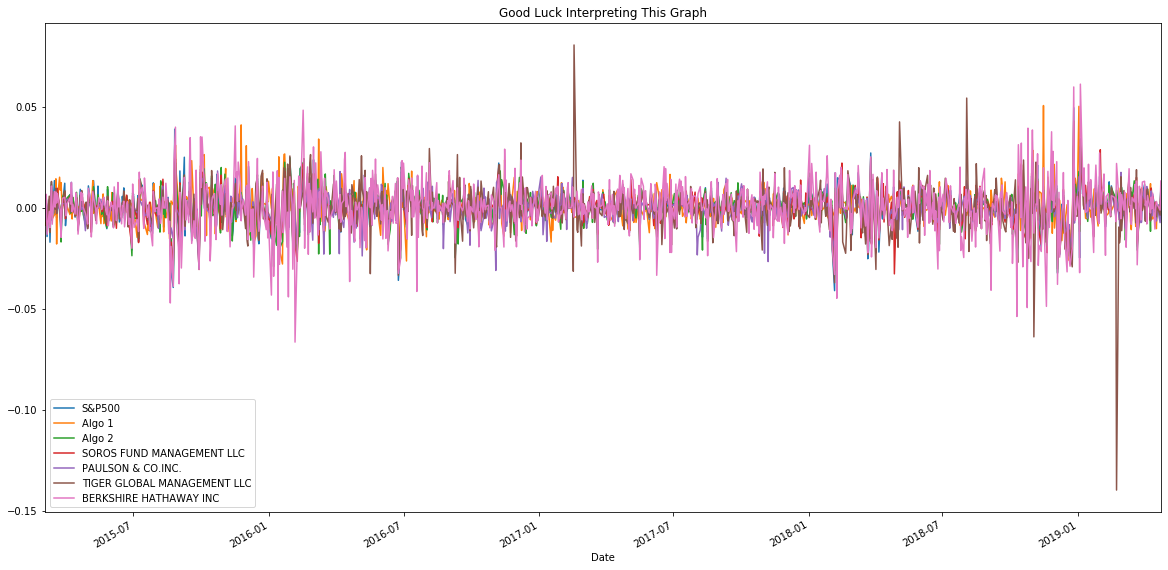

In [76]:
# Plot daily returns
returns_daily.plot(figsize=(20,10), title=("Good Luck Interpreting This Graph"))

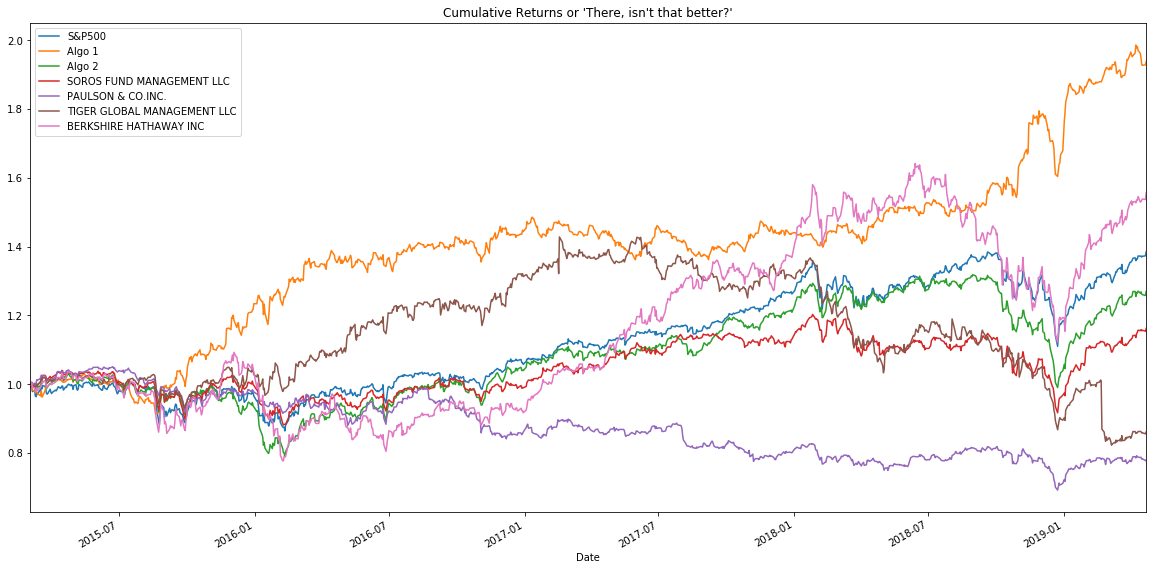

In [77]:
# Plot cumulative returns
cumulative_returns = (1 + returns_daily).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns or 'There, isn't that better?'")

### ~Does any portfolio outperform the S&P 500?

We can see that there are several portfolios that beat the S&P500 over the long term. The most evident outperformances are Harold's "Algo 1" portfolio, the Tiger Global Management Fund, and the Berkshire Hathaway Fund. 

The strongest porftolio in the mix is Harold's "Algo 1" portfolio, with significant returns over those of the S&P500. These gains last from about Q3 2015 until the end of our analysis. 

The next evident outperformer is the Tiger Global Management Fund. This fund outperforms the S&P500 from about Q1 2016 until Q1 2018. At this point, the fund begins a rapid decline in performance in comparison to that of the market. 

The final outperformer worth investigating is the Berkshire Hathaway Fund. While the fund initially tracks the S&P rather closely, in Q1 2016 we se it drop below market performances. It makes a steady recovery and eventually passes the S&P at the end of Q2 2017. At this point the fund steadily outperforms the S&P500, with the exception of Q4 2018 and Q1 2019, when the fund undergoes a sharp negative spike. This only brings the fund down to the S&P levels, at which point the fund then moves away from the S&P500 again. 

Interesting note, the end of Q2 2017 is when Berkshire Hathaway converted about *5billion* dollars worth of shares of BAC stock. This caused investors to increase the purchasing of Berkshire Hathaway stock. 

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

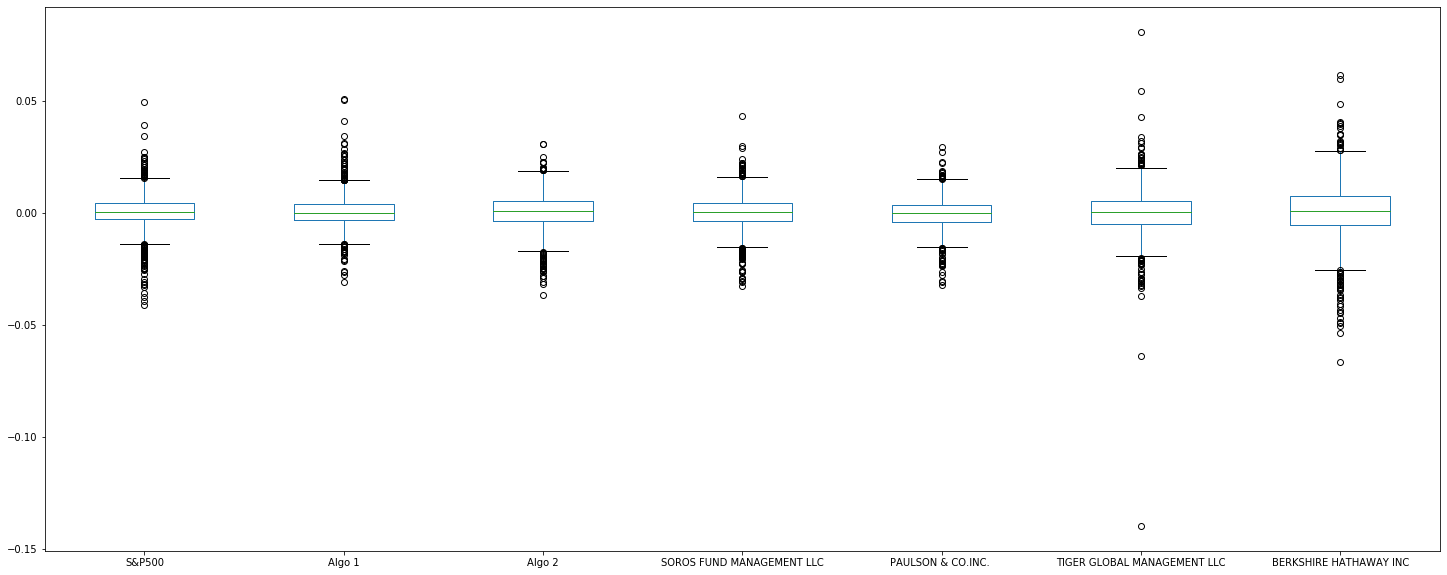

In [31]:
# Box plot to visually show risk
returns_daily.plot.box(figsize=(25,10))

### ~Which box has the largest spread? Which has the smallest spread?

In the box plots above we can see the largest spread occurring in the Tiger Global Management Portfolio, with Berkshire Hathaway in second. The smallest spreads occur in the Paulson & Co and "Algo 2" portfolios.

In [32]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
returns_std = returns_daily.std()

In [33]:
# Determine which portfolios are riskier than the S&P 500
returns_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010893
S&P500                         0.008555
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007024
dtype: float64

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205085
TIGER GLOBAL MANAGEMENT LLC    0.172928
S&P500                         0.135808
Algo 2                         0.132415
SOROS FUND MANAGEMENT LLC      0.125327
Algo 1                         0.120979
PAULSON & CO.INC.              0.111500
dtype: float64

### ~Which portfolios are riskier than the S&P 500?

We can see from the standard deviation and the annualized standard deviation that both Berkshire Hathaway and Tiger Global Management have higher standard deviations than the the S&P 500; therefore, they have higher risk. 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

#### *According to HW question, which is slightly different than the instructions, we are to compare the rolling standard deviation vs the s&p500. This is the direction we will take in the next step.*

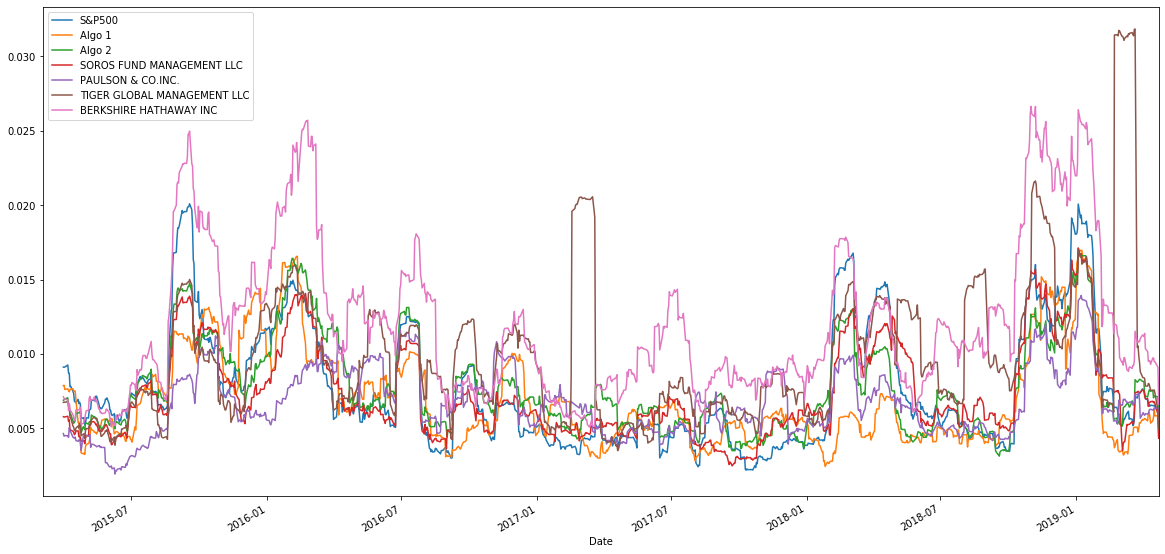

In [35]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_returns=returns_daily.rolling(window=21).std().plot(figsize=(20,10))

### ~Does risk increase for each of the portfolios at the same time risk increases in the S&P?

In general, the firm's portfolios follow the same risk profile as that of the S&P 500. There are several firms whose risk increases significantly compared to that of the S&P. These firms, as confirmed from previous analysis, are the Tiger Global Management Fund, and Berkshire Hathaway.

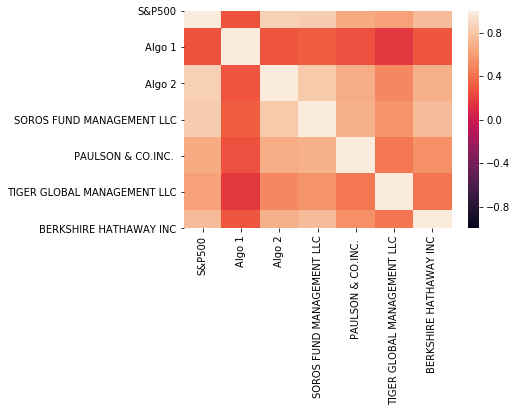

In [36]:
# Correlation
correlation = returns_daily.corr()

# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

#### ~Which returns most closely mimic the S&P?
The heatmap above shows us that the Algo 1 portfolio most closely mimics the S&P index. The second closest is Tiger Global Management. It is important to distinguish between this metric and the overall returns metric we calculated earlier. While the Tiger Global Management may follow the S&P in terms of risk (i.e. standard deviation), this does *not* inform us of the total performance of the Tiger Global Management portfolio. We will utilize the Sharpe Ratio calculation below to consider risk vs returns.

## Calculating Beta

In [37]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = returns_daily['BERKSHIRE HATHAWAY INC'].cov(returns_daily['S&P500'])
covariance

8.303931732986384e-05

In [38]:
variance = returns_daily['S&P500'].var()
variance

7.318939197980133e-05

In [39]:
beta = covariance/variance
beta=round(beta, 4)
print(beta)

1.1346


In [40]:
#Rolling 21 day covariance.
rolling_covariance = returns_daily['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(returns_daily['S&P500'])

In [41]:
# 21 Day rolling variance.
rolling_variance = returns_daily['S&P500'].rolling(window=30).var()

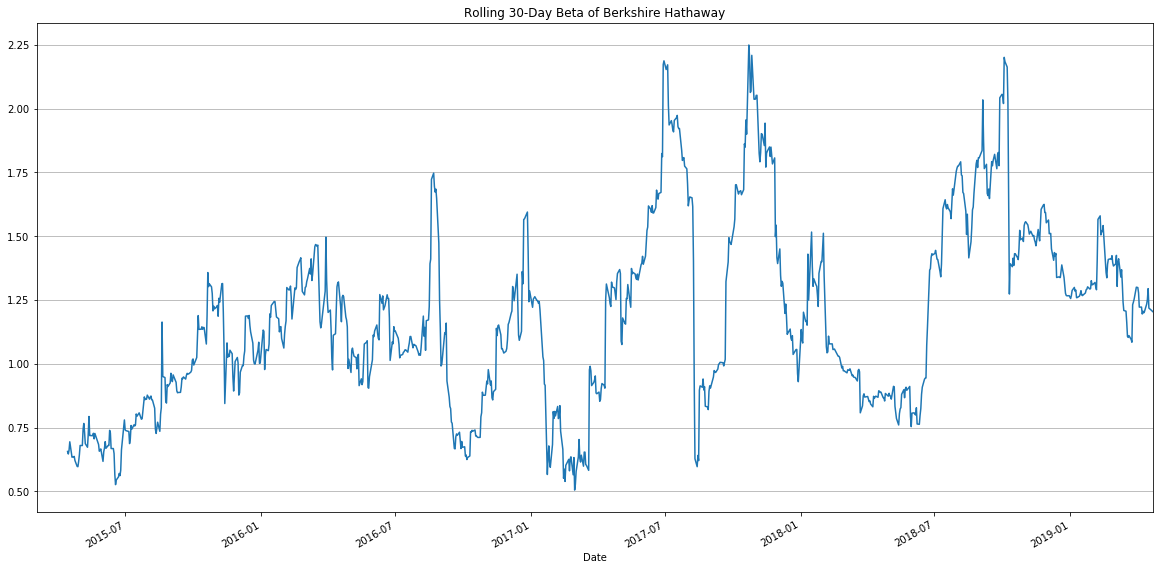

In [42]:
# 21 Day rolling beta
rolling_beta = rolling_covariance / rolling_variance

fig, ax2 = plt.subplots()

rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire Hathaway', ax=ax2)
ax2.grid(axis='y')

#### ~Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

Based on the rolling standard deviation plotted above, the author determined that Berkshire Hathaway displayed the most likely sensitivity to movements in the market. This was tested via the beta correlation. We can see, based on a beta score of 1.135 that Berkshire Hathaway is very sensitive to market movements. This is confirmed upon inspection of the rolling beta plot above. We can see that an overwhelming amount of beta values occur above 1.00 for Berkshire Hathaway. We can see that this portfolio is very sensitive to movements in the S&P index.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [43]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [44]:
# Annualzied Sharpe Ratios
sharpe_ratios = (returns_daily.mean() * 252) / (returns_daily.std() * np.sqrt(252))
sharpe_ratios

S&P500                         0.647580
Algo 1                         1.381615
Algo 2                         0.502144
SOROS FUND MANAGEMENT LLC      0.352216
PAULSON & CO.INC.             -0.482355
TIGER GLOBAL MANAGEMENT LLC   -0.121275
BERKSHIRE HATHAWAY INC         0.624510
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

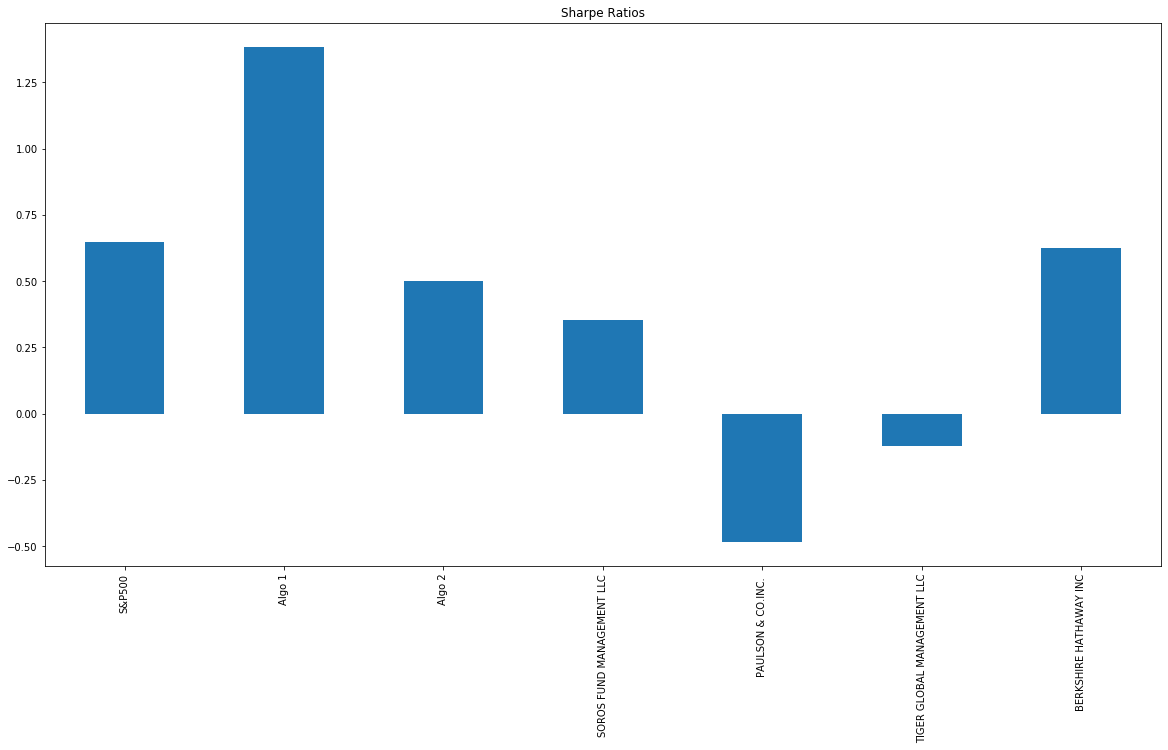

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title= "Sharpe Ratios",figsize=(20,10))

#### ~Determine the best (and worst) performers.
We can see from the Sharpe Ratios above that "Algo 1" has the best performance of the studied portfolios, while "Algo 2" underperformed against the market and Berkshire Hathaway. Additionally, we can confirm previous data the Tiger Global Management performed worse than the market. That is to say, it has *negative* returns-to-risk ratio. We can finally observe that Paulson & Co has the absolute worst returns-to-risk ratio, over the period investigated. 

Comparing the Sharpe Ratios plot above with the Cumulative returns plot earlier as well as the Std. Deviations, we can confirm this position. Furthermore, it is important to note that the Sharpe Ratio only considers the portfolio's performance *against itself*. That is to say, the formula does not consider any information from the overall market. Therefore, *the sign* of the Sharpe Ratio indicates whether or not the portfolio had positive or negative returns over the selected period. Conversely, *the magnitude* of the ratio indicates the magnitude of the portfolio's returns versus its standard deviation. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [46]:
# Read the first stock, Rename column "Close" to "BAC_Close"
bac_close_path = Path("../Pandas-Homework/STOCKS/5yr-BAC.csv")
bac_close_csv = pd.read_csv(bac_close_path, parse_dates=True, infer_datetime_format=True)
bac_close_csv.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/08/2020,$34.97,45336660,$34.57,$35.19,$34.55
1,01/07/2020,$34.62,34348580,$34.7,$34.92,$34.53
2,01/06/2020,$34.85,42233300,$34.41,$34.9,$34.37
3,01/03/2020,$34.9,50763660,$34.98,$35.15,$34.76
4,01/02/2020,$35.64,37643860,$35.35,$35.66,$35.29


In [47]:
# # bac_close_csv["Date"]=pd.to_datetime(bac_close_csv["Date"])
bac_close_csv.rename(columns={" Close/Last": "BAC"}, inplace=True)
bac_close_csv = bac_close_csv.drop(columns=[" Volume", " Open", " High", " Low"])

In [48]:
# # Read the second stock, rename column "Close" to "RTN_Close", drop column "Date"
rtn_close_path = Path("../Pandas-Homework/STOCKS/5yr-RTN.csv")
rtn_close_csv = pd.read_csv(rtn_close_path)
rtn_close_csv.rename(columns={" Close/Last": "RTN"}, inplace=True)
rtn_close_csv = rtn_close_csv.drop(columns=[" Open", " High", " Low", " Volume", "Date"])

In [49]:
# # Read the third stock, rename column "Close" to "BA_Close", drop column "Date"
ba_close_path = Path("../Pandas-Homework/STOCKS/5yr-BA.csv")
ba_close_csv = pd.read_csv(ba_close_path)
ba_close_csv.rename(columns={" Close/Last": "BA"}, inplace=True)
ba_close_csv = ba_close_csv.drop(columns=[" Open", " High", " Low", " Volume", "Date"])

In [50]:
# # Concatenate all stocks into a single DataFrame
close_prices = pd.concat([ba_close_csv,rtn_close_csv,bac_close_csv], axis="columns", join="inner", sort=False)

In [51]:
# # Reset the index
close_prices.set_index("Date", inplace=True)
close_prices.head()

,BA,RTN,BAC
Date,,,
01/08/2020,$331.37,$227.4,$34.97
01/07/2020,$337.28,$226.54,$34.62
01/06/2020,$333.74,$227.53,$34.85
01/03/2020,$332.76,$227.81,$34.9
01/02/2020,$333.32,$224.48,$35.64


In [52]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
## MY TICKERS ARE ALREADY THE COLUMNS. AIN'T FINNA PIVOT NADA.
## BUT I WILL FIX CLOSE TO RETURNS
close_prices["BA"] = close_prices["BA"].str.replace('$','')
close_prices["RTN"] = close_prices["RTN"].str.replace('$','')
close_prices["BAC"] = close_prices["BAC"].str.replace('$','')
close_prices["BA"] = close_prices["BA"].astype('float')
close_prices["RTN"] = close_prices["RTN"].astype('float')
close_prices["BAC"] = close_prices["BAC"].astype('float')

In [53]:
close_prices.head()

,BA,RTN,BAC
Date,,,
01/08/2020,331.37,227.40,34.97
01/07/2020,337.28,226.54,34.62
01/06/2020,333.74,227.53,34.85
01/03/2020,332.76,227.81,34.90
01/02/2020,333.32,224.48,35.64


In [54]:
# Drop Nulls
close_prices.isnull().sum()

BA     0
RTN    0
BAC    0
dtype: int64

In [55]:
returns = close_prices.pct_change()
returns.head()

,BA,RTN,BAC
Date,,,
01/08/2020,NaN,NaN,NaN
01/07/2020,0.017835,-0.003782,-0.010009
01/06/2020,-0.010496,0.004370,0.006644
01/03/2020,-0.002936,0.001231,0.001435
01/02/2020,0.001683,-0.014617,0.021203


In [56]:
returns.index = pd.to_datetime(returns.index)
returns.head()

,BA,RTN,BAC
Date,,,
2020-01-08,NaN,NaN,NaN
2020-01-07,0.017835,-0.003782,-0.010009
2020-01-06,-0.010496,0.004370,0.006644
2020-01-03,-0.002936,0.001231,0.001435
2020-01-02,0.001683,-0.014617,0.021203


In [57]:
type(returns)

pandas.core.frame.DataFrame

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns=returns.dot(weights)
portfolio_returns=portfolio_returns.to_frame()

In [59]:
portfolio_returns.rename(columns={0:"Pers_Returns"}, inplace=True)

In [60]:
portfolio_returns.head()

,Pers_Returns
Date,
2020-01-08,NaN
2020-01-07,0.001348
2020-01-06,0.000173
2020-01-03,-0.000090
2020-01-02,0.002756


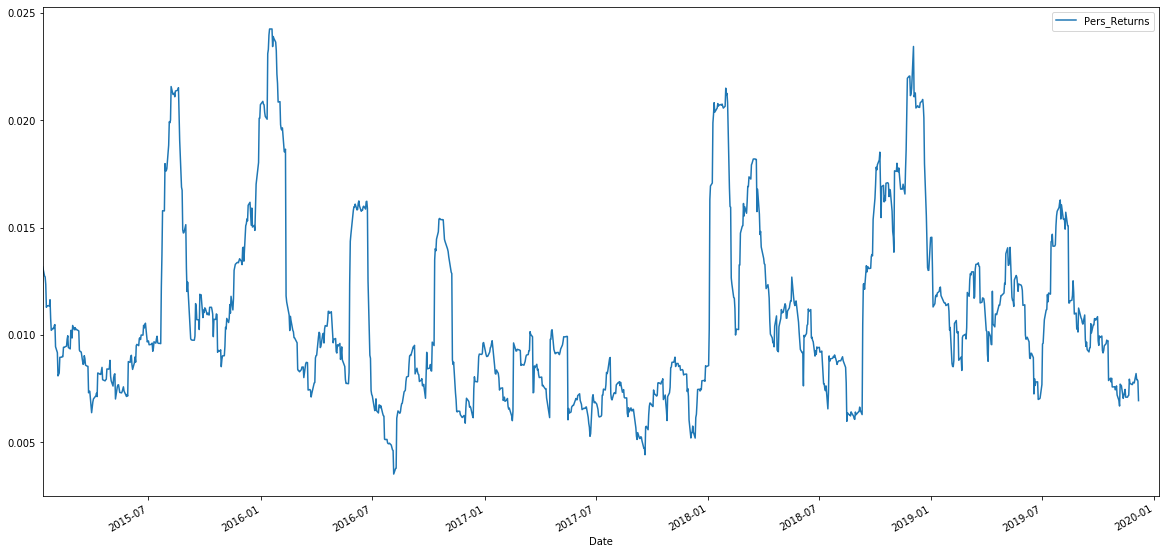

In [61]:
portfolio_rolling_returns=portfolio_returns.rolling(window=21).std().plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [62]:
# YOUR CODE HERE

In [63]:
# Only compare dates where the new, custom portfolio has dates
all_returns = pd.concat([returns_daily, portfolio_returns],axis="columns", join="inner", sort=False)
all_returns.head()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Pers_Returns
Date,,,,,,,,
2015-03-03,-0.0045,-0.0019,-0.0009,-0.0013,-0.0050,-0.0005,-0.0066,0.011277
2015-03-04,-0.0044,-0.0086,0.0024,0.0022,0.0032,-0.0025,0.0042,-0.004216
2015-03-05,0.0012,-0.0010,0.0043,0.0040,0.0041,0.0024,0.0067,0.003962
2015-03-06,-0.0142,-0.0050,-0.0115,-0.0079,-0.0036,-0.0085,-0.0131,-0.007657
2015-03-09,0.0039,-0.0054,0.0013,0.0006,0.0042,0.0058,-0.0017,0.019280


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

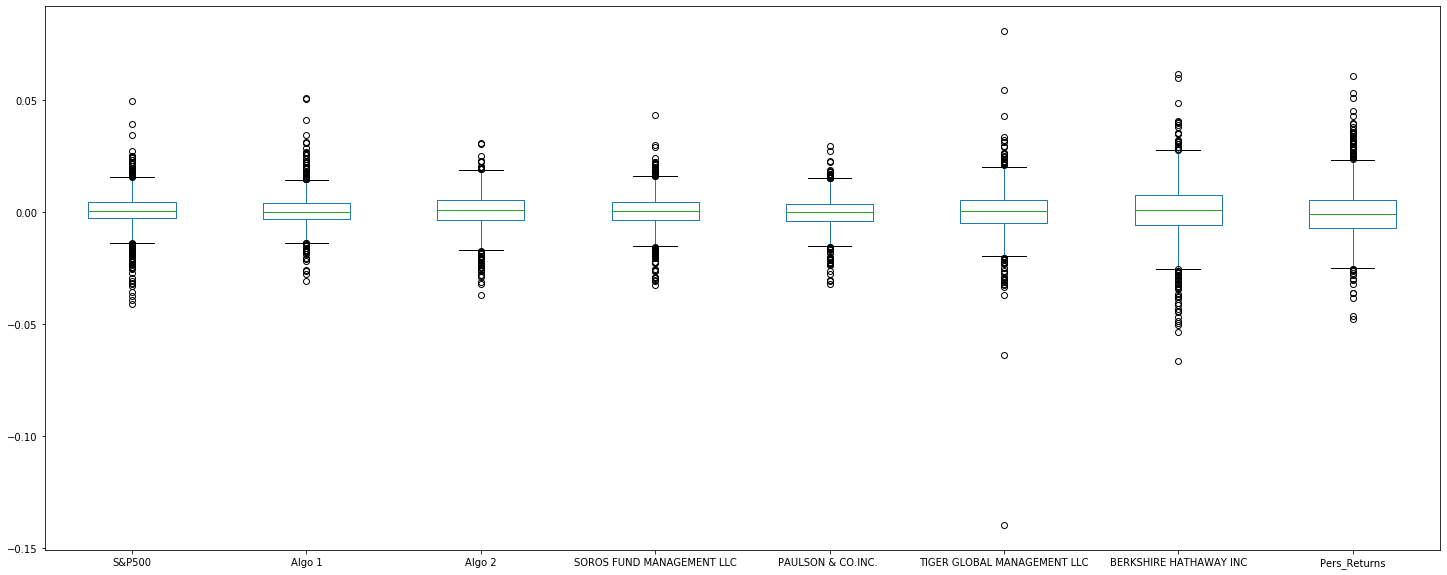

In [64]:
# Risk
all_returns.plot.box(figsize=(25,10))

In [65]:
all_std = all_returns.std()

In [66]:
all_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
Pers_Returns                   0.011653
TIGER GLOBAL MANAGEMENT LLC    0.010893
S&P500                         0.008555
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007024
dtype: float64

In [67]:
all_returns_annualized_std = all_std * np.sqrt(252)
all_returns_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205085
Pers_Returns                   0.184982
TIGER GLOBAL MANAGEMENT LLC    0.172928
S&P500                         0.135808
Algo 2                         0.132415
SOROS FUND MANAGEMENT LLC      0.125327
Algo 1                         0.120979
PAULSON & CO.INC.              0.111500
dtype: float64

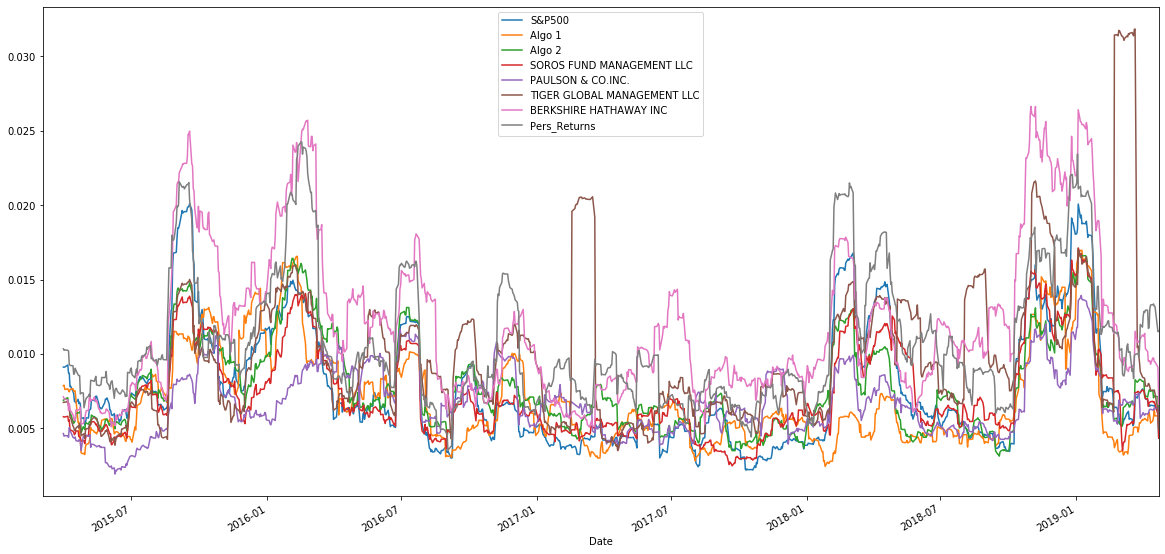

In [68]:
# Rolling
all_rolling_returns=all_returns.rolling(window=21).std().plot(figsize=(20,10))

In [69]:
# Beta
covariance = all_returns['Pers_Returns'].cov(all_returns['S&P500'])
covariance

variance = all_returns['S&P500'].var()
variance

beta_all = covariance/variance
beta_all =round(beta, 4)
print(beta)

1.1346


In [70]:
# Annualzied Sharpe Ratios
sharpe_ratios_all = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_all

S&P500                         0.647580
Algo 1                         1.381615
Algo 2                         0.502144
SOROS FUND MANAGEMENT LLC      0.352216
PAULSON & CO.INC.             -0.482355
TIGER GLOBAL MANAGEMENT LLC   -0.121275
BERKSHIRE HATHAWAY INC         0.624510
Pers_Returns                  -0.741302
dtype: float64

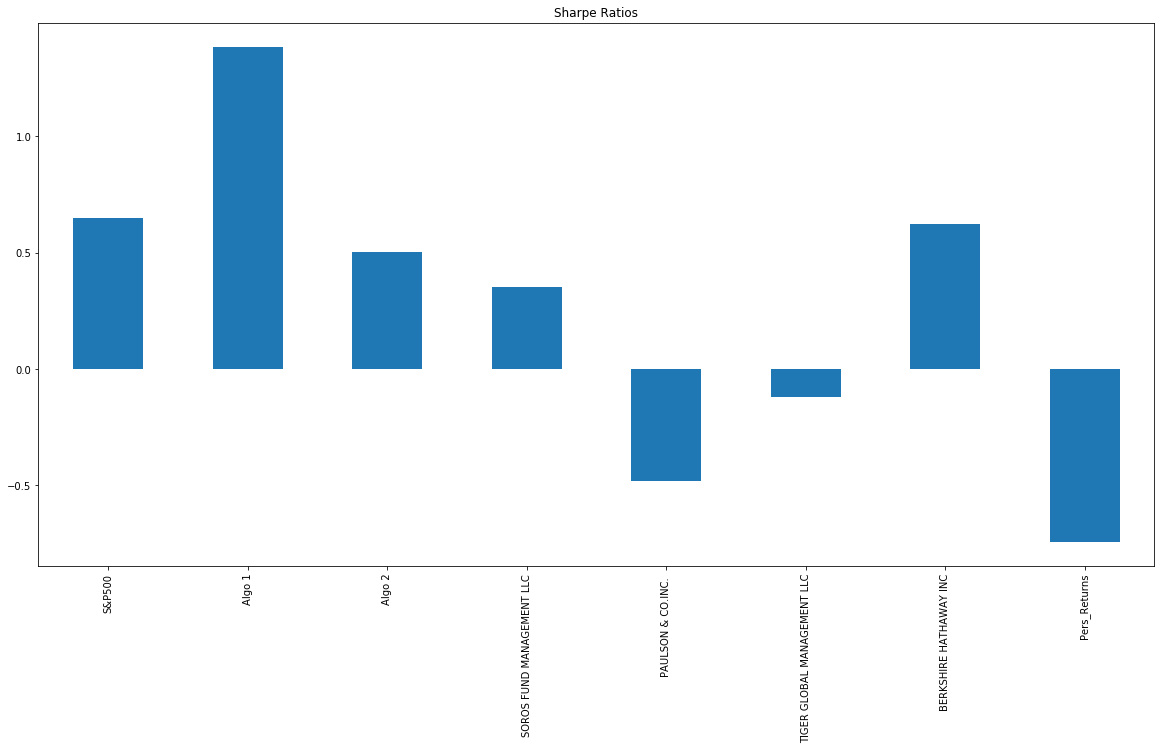

In [71]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title= "Sharpe Ratios",figsize=(20,10))

In [72]:
## I also want to look at the sharpe ration just within my portfolio
sharpe_ratios_pers = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
sharpe_ratios_pers

BA    -0.602827
RTN   -0.668579
BAC   -0.435767
dtype: float64

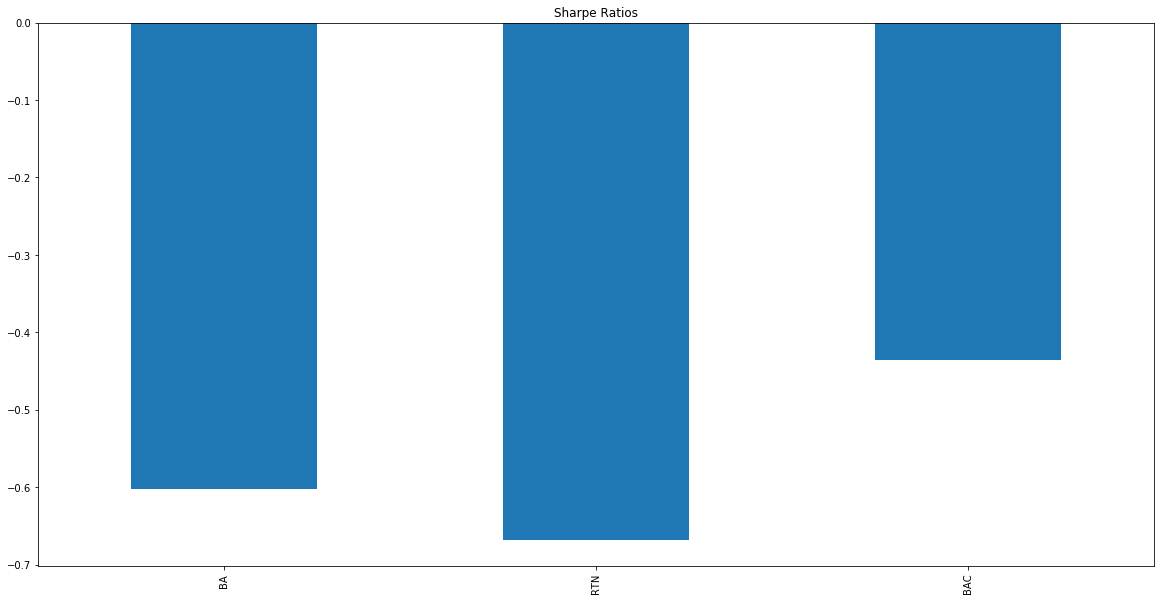

In [73]:
sharpe_ratios_pers.plot(kind="bar", title= "Sharpe Ratios",figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [74]:
correlation_personal = returns.corr()
correlation_personal

,BA,RTN,BAC
BA,1.000000,0.436163,0.443714
RTN,0.436163,1.000000,0.314408
BAC,0.443714,0.314408,1.000000


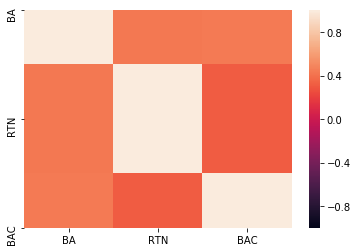

In [75]:
sns.heatmap(correlation_personal, vmin=-1, vmax=1)

#### ~How did your personal portfolio perform?

Luckily, I don't actually hold stock in any Boeing or Raytheon. During the selected period, all of these stocks have a highly negative Sharpe Ratio, and the portfolio as a whole has *the worst* sharpe ratio compared to the other selected portfolios.